#  Analyze New York Bike System

## By Ghadah 

##Jan-2020



# Table Of Contents:
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#Wrangling">Wrangling </a></li>
    <li><a href="#Univariate">univariate </a></li>
    <li><a href="#Bivariate">Bivariate </a></li>
    <li><a href="#Multivariate">Multivariate </a></li>
    <li><a href="#References">References </a></li>



    
    
    

# <a id="#introduction:">Introduction</a>

This system was found to help people navigate the city and help them practice the sport of riding bikes, and it has gained wide popularity among people and a lot of companies have become investing in this field and it is certain that companies need to know what months of the year are most requested and to know the stations that start from the degrees and know the type of users And most of them use the system, their gender, and their ages from every city you want to invest in, to help the administration to take the right decisions in marketing and provide the appropriate number of grades to meet the needs of users. This project was worked on the data provided by the city NewyYork in the United States only  for the year 2019 from   January to November (11 months)
the dataset in this link https://www.citibikenyc.com/system-data



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline
import seaborn as sns
import seaborn as sb
import csv
import datetime as dt
import calendar

****Read the folder from my Pc in desktop
I referred to this website to help me to how read myfiles from desktop i ues it as references 
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [2]:

path =r'C:\Users\USER\Desktop\Project7'
filenames = glob.glob(path + "/*.csv")

NewyYorkBikes = []
for filename in filenames:
    NewyYorkBikes.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
NewyYorkBike = pd.concat(NewyYorkBikes, ignore_index=True)

In [3]:
#display the head dataframe
NewyYorkBike.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [4]:
NewyYorkBike.sample(30)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
151477,455,2019-06-16 14:47:50.1180,2019-06-16 14:55:26.0040,3640,Journal Square,40.733670,-74.062500,3207,Oakland Ave,40.737604,-74.052478,26222,Subscriber,1971,1
379915,495,2019-11-25 01:20:43.8690,2019-11-25 01:28:59.5900,3195,Sip Ave,40.730897,-74.063913,3210,Pershing Field,40.742677,-74.051789,29220,Subscriber,1995,2
6089,540,2019-01-15 18:42:03.5150,2019-01-15 18:51:04.4080,3195,Sip Ave,40.730743,-74.063784,3280,Astor Place,40.719282,-74.071262,26173,Subscriber,1986,2
6468,318,2019-01-27 08:23:25.7260,2019-01-27 08:28:44.7240,3195,Sip Ave,40.730743,-74.063784,3679,Bergen Ave,40.722104,-74.071455,29588,Subscriber,1988,1
250893,1199,2019-08-24 12:19:59.8750,2019-08-24 12:39:59.0240,3184,Paulus Hook,40.714145,-74.033552,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,26296,Customer,1969,0
381828,1747,2019-11-26 13:11:53.7320,2019-11-26 13:41:00.9970,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,26194,Customer,1989,1
98581,236,2019-05-03 21:20:08.8100,2019-05-03 21:24:05.0750,3195,Sip Ave,40.730897,-74.063913,3678,Fairmount Ave,40.725726,-74.071959,29540,Subscriber,1990,1
41412,337,2019-03-12 18:32:11.1910,2019-03-12 18:37:48.7890,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,26261,Subscriber,1984,1
360861,620,2019-11-06 07:08:55.5780,2019-11-06 07:19:15.8870,3268,Lafayette Park,40.713464,-74.062859,3186,Grove St PATH,40.719586,-74.043117,26289,Subscriber,1999,1
115529,615,2019-05-18 21:38:07.3970,2019-05-18 21:48:22.6040,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29516,Subscriber,1964,1


In [5]:
# View information of the dataframe by using function info()
NewyYorkBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385219 entries, 0 to 385218
Data columns (total 15 columns):
tripduration               385219 non-null int64
starttime                  385219 non-null object
stoptime                   385219 non-null object
start station id           385219 non-null int64
start station name         385219 non-null object
start station latitude     385219 non-null float64
start station longitude    385219 non-null float64
end station id             385219 non-null int64
end station name           385219 non-null object
end station latitude       385219 non-null float64
end station longitude      385219 non-null float64
bikeid                     385219 non-null int64
usertype                   385219 non-null object
birth year                 385219 non-null int64
gender                     385219 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 44.1+ MB


In [6]:

# View descriptive of the dataframe
NewyYorkBike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,3.852190e+05,385219.000000,385219.000000,385219.000000,385219.000000,385219.000000,385219.000000,385219.000000,385219.000000,385219.000000
mean,7.353228e+02,3293.554277,40.722715,-74.046300,3291.455398,40.722324,-74.045766,28462.434369,1981.418959,1.160846
std,9.919339e+03,170.524253,0.007057,0.010853,180.388743,0.006904,0.010810,1654.817507,10.253055,0.517462
min,6.100000e+01,3183.000000,40.709651,-74.083639,116.000000,40.695065,-74.083639,14792.000000,1887.000000,0.000000
25%,2.330000e+02,3194.000000,40.718355,-74.050444,3192.000000,40.718211,-74.050389,26286.000000,1975.000000,1.000000
50%,3.460000e+02,3210.000000,40.721525,-74.043845,3207.000000,40.721124,-74.043117,29283.000000,1984.000000,1.000000
75%,5.850000e+02,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,29536.000000,1989.000000,1.000000
max,2.566420e+06,3792.000000,40.748716,-74.032108,3792.000000,40.814326,-73.932077,41913.000000,2003.000000,2.000000


In [7]:
NewyYorkBike.shape

(385219, 15)

# Issues:

1-Clean gender culmn and Replace the data (o=other,1=male,2=female) and change the datatype to object.
2- Calculate the Age of users using a birth year column .
3- Extract the tripduration of minutes and tripduration of hours from tripduration seconds.
4-change datatype  for starttime and  stoptime to datetime for calculate months ,weekdays,hours 


# <a id="Wrangling">Wrangling Phase: </a>


In [8]:
# Create copies of original DataFrames
NewyYorkBike_clean= NewyYorkBike.copy()

# 1- Clean gender culmn and Replace the data 

In [9]:
#clean culmns member gender
NewyYorkBike_clean['gender']

0         1
1         2
2         1
3         0
4         0
         ..
385214    1
385215    1
385216    1
385217    1
385218    1
Name: gender, Length: 385219, dtype: int64

In [10]:
#definition
#convert the 1 to Male , 2 to female and  0 to Other by using replace function
#code
NewyYorkBike_clean['gender'].replace(1,'Male',inplace=True)
NewyYorkBike_clean['gender'].replace(2,'Female',inplace=True)
NewyYorkBike_clean['gender'].replace(0,'Other',inplace=True)

In [11]:
#test
NewyYorkBike_clean.sample(20)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
305866,674,2019-09-27 07:30:53.4670,2019-09-27 07:42:07.4690,3268,Lafayette Park,40.713464,-74.062859,3186,Grove St PATH,40.719586,-74.043117,29537,Subscriber,1975,Male
43243,204,2019-03-28 19:02:20.5720,2019-03-28 19:05:45.2190,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29458,Subscriber,1967,Male
186467,279,2019-07-12 17:44:11.6250,2019-07-12 17:48:51.0820,3275,Columbus Drive,40.718355,-74.038914,3211,Newark Ave,40.721525,-74.046305,26244,Subscriber,1981,Male
171674,149,2019-07-01 18:57:47.8070,2019-07-01 19:00:17.3580,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,27269,Subscriber,1991,Male
150316,647,2019-06-15 14:07:11.8580,2019-06-15 14:17:58.8860,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,26192,Subscriber,1989,Female
260443,2527,2019-08-30 09:45:32.2810,2019-08-30 10:27:40.0810,3278,Monmouth and 6th,40.725685,-74.048790,3278,Monmouth and 6th,40.725685,-74.048790,29674,Subscriber,1988,Male
71125,514,2019-04-02 19:36:53.1940,2019-04-02 19:45:27.7420,3195,Sip Ave,40.730897,-74.063913,3225,Baldwin at Montgomery,40.723659,-74.064194,29646,Subscriber,1967,Male
274851,294,2019-09-09 08:40:54.6690,2019-09-09 08:45:49.3420,3202,Newport PATH,40.727224,-74.033759,3639,Harborside,40.719252,-74.034234,29660,Subscriber,1992,Male
67270,162,2019-04-18 21:01:30.6480,2019-04-18 21:04:13.1030,3186,Grove St PATH,40.719586,-74.043117,3279,Dixon Mills,40.721630,-74.049968,29247,Subscriber,1981,Female
289587,211,2019-09-18 05:14:28.3680,2019-09-18 05:17:59.7430,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,29455,Subscriber,1991,Male


In [12]:
#drop other from gender culmn 
NewyYorkBike_clean = NewyYorkBike_clean[NewyYorkBike_clean['gender']!= 'Other']

In [13]:
#Test
NewyYorkBike_clean['gender']

0           Male
1         Female
2           Male
5           Male
6           Male
           ...  
385214      Male
385215      Male
385216      Male
385217      Male
385218      Male
Name: gender, Length: 359642, dtype: object

In [14]:
#test
NewyYorkBike_clean.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
189145,356,2019-07-14 16:23:32.8440,2019-07-14 16:29:28.8450,3679,Bergen Ave,40.722104,-74.071455,3195,Sip Ave,40.730897,-74.063913,26217,Subscriber,1986,Male
305387,173,2019-09-26 19:23:15.1760,2019-09-26 19:26:08.5970,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3214,Essex Light Rail,40.712774,-74.036486,29608,Subscriber,1984,Male
73511,2422,2019-04-19 10:13:37.6340,2019-04-19 10:54:00.2520,3199,Newport Pkwy,40.728745,-74.032108,3193,Lincoln Park,40.724605,-74.078406,29677,Subscriber,1975,Male
355170,909,2019-11-01 14:50:36.9920,2019-11-01 15:05:46.6260,3184,Paulus Hook,40.714145,-74.033552,3276,Marin Light Rail,40.714584,-74.042817,29258,Subscriber,1994,Male
162095,312,2019-06-25 08:13:00.2950,2019-06-25 08:18:13.1220,3278,Monmouth and 6th,40.725685,-74.048790,3186,Grove St PATH,40.719586,-74.043117,26180,Subscriber,1988,Female
216797,792,2019-08-02 13:17:27.8660,2019-08-02 13:30:39.9800,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,3211,Newark Ave,40.721525,-74.046305,29454,Subscriber,1993,Male
303387,292,2019-09-25 18:26:38.0180,2019-09-25 18:31:30.4940,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3267,Morris Canal,40.712419,-74.038526,29512,Subscriber,1989,Female
250733,355,2019-08-24 10:41:11.4760,2019-08-24 10:47:07.2940,3202,Newport PATH,40.727224,-74.033759,3267,Morris Canal,40.712419,-74.038526,26243,Subscriber,1989,Male
120932,200,2019-05-22 18:55:18.6000,2019-05-22 18:58:39.1210,3276,Marin Light Rail,40.714584,-74.042817,3186,Grove St PATH,40.719586,-74.043117,29672,Subscriber,1994,Male
224086,298,2019-08-07 07:11:16.1360,2019-08-07 07:16:14.6780,3678,Fairmount Ave,40.725726,-74.071959,3195,Sip Ave,40.730897,-74.063913,29539,Subscriber,1985,Male


In [15]:
#Test
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359642 entries, 0 to 385218
Data columns (total 15 columns):
tripduration               359642 non-null int64
starttime                  359642 non-null object
stoptime                   359642 non-null object
start station id           359642 non-null int64
start station name         359642 non-null object
start station latitude     359642 non-null float64
start station longitude    359642 non-null float64
end station id             359642 non-null int64
end station name           359642 non-null object
end station latitude       359642 non-null float64
end station longitude      359642 non-null float64
bikeid                     359642 non-null int64
usertype                   359642 non-null object
birth year                 359642 non-null int64
gender                     359642 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 43.9+ MB


# 2- Calculate the Age of users using a birth year column 

In [16]:
#code
# Exract the member age from the 2020 year to get the ages of the members
NewyYorkBike_clean['Age'] = 2020- NewyYorkBike_clean['birth year']

In [17]:
#Test
NewyYorkBike_clean.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age
258821,278,2019-08-29 11:06:20.0980,2019-08-29 11:10:58.3910,3276,Marin Light Rail,40.714584,-74.042817,3275,Columbus Drive,40.718355,-74.038914,26310,Subscriber,1972,Female,48
123957,376,2019-05-25 12:01:27.0700,2019-05-25 12:07:43.7040,3267,Morris Canal,40.712419,-74.038526,3186,Grove St PATH,40.719586,-74.043117,26202,Customer,1987,Male,33
310881,641,2019-09-30 08:32:27.2690,2019-09-30 08:43:08.5960,3268,Lafayette Park,40.713464,-74.062859,3185,City Hall,40.717733,-74.043845,29595,Subscriber,1995,Female,25
194126,132,2019-07-17 18:19:20.4230,2019-07-17 18:21:32.9620,3198,Heights Elevator,40.748716,-74.040443,3196,Riverview Park,40.744319,-74.043991,26192,Subscriber,1992,Male,28
139404,189,2019-06-07 05:38:59.9940,2019-06-07 05:42:09.4280,3209,Brunswick St,40.724176,-74.050656,3273,Manila & 1st,40.721651,-74.042884,29306,Subscriber,1992,Female,28
57825,305,2019-03-08 07:34:23.1370,2019-03-08 07:39:29.0770,3279,Dixon Mills,40.721630,-74.049968,3481,York St,40.716490,-74.041050,29450,Subscriber,1976,Male,44
325569,166,2019-10-10 08:44:26.9520,2019-10-10 08:47:13.9350,3272,Jersey & 3rd,40.723332,-74.045953,3213,Van Vorst Park,40.718489,-74.047727,26263,Subscriber,1964,Female,56
49528,280,2019-03-28 08:44:33.8990,2019-03-28 08:49:14.3440,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,40.719586,-74.043117,29664,Subscriber,1982,Male,38
23203,425,2019-02-22 18:17:36.7940,2019-02-22 18:24:42.7330,3186,Grove St PATH,40.719586,-74.043117,3214,Essex Light Rail,40.712774,-74.036486,29250,Subscriber,1981,Male,39
195181,424,2019-07-18 17:59:09.5970,2019-07-18 18:06:13.6160,3186,Grove St PATH,40.719586,-74.043117,3681,Grand St,40.715178,-74.037683,29617,Subscriber,1994,Male,26


In [18]:
NewyYorkBike_clean.Age.describe()

count    359642.000000
mean         37.819359
std           9.944973
min          17.000000
25%          31.000000
50%          35.000000
75%          43.000000
max         132.000000
Name: Age, dtype: float64

In [19]:
NewyYorkBike_clean.Age.describe(percentiles = [ .99])

count    359642.000000
mean         37.819359
std           9.944973
min          17.000000
50%          35.000000
99%          66.000000
max         132.000000
Name: Age, dtype: float64

In [20]:
NewyYorkBike_clean.Age.max()

132

In [21]:
NewyYorkBike_clean.Age.mean()

37.819359251700305

In [22]:
#delet the user her age more 66 because 99% for user age is 66 yers
NewyYorkBike_clean= NewyYorkBike_clean.query('Age <= 66')

In [23]:
#test
NewyYorkBike_clean.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age
285065,484,2019-09-15 12:19:32.2540,2019-09-15 12:27:36.5120,3483,Montgomery St,40.719420,-74.050990,3639,Harborside,40.719252,-74.034234,29530,Subscriber,1974,Female,46
186474,274,2019-07-12 17:47:02.9580,2019-07-12 17:51:36.9590,3195,Sip Ave,40.730897,-74.063913,3678,Fairmount Ave,40.725726,-74.071959,26192,Subscriber,1983,Male,37
122870,374,2019-05-24 13:17:46.5280,2019-05-24 13:24:00.5390,3187,Warren St,40.721124,-74.038051,3185,City Hall,40.717733,-74.043845,29657,Subscriber,1978,Male,42
135614,216,2019-06-04 14:48:48.0200,2019-06-04 14:52:24.3590,3203,Hamilton Park,40.727596,-74.044247,3211,Newark Ave,40.721525,-74.046305,26265,Subscriber,1980,Female,40
149241,664,2019-06-14 17:46:58.8070,2019-06-14 17:58:03.3140,3199,Newport Pkwy,40.728745,-74.032108,3186,Grove St PATH,40.719586,-74.043117,26245,Subscriber,1990,Female,30


In [24]:
#Test
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 16 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null object
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
dtypes: float64(4), int64(6), object(6)
memory usage: 46.3+ MB


divide the Age as groups i refer to this link as references: 
https://dfrieds.com/data-analysis/bin-values-python-pandas

In [25]:
NewyYorkBike_clean['Age_Grop'] = pd.cut(x=NewyYorkBike_clean['Age'], bins=[16, 26, 36, 46,56,66])

In [26]:
NewyYorkBike_clean.sample(15)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age,Age_Grop
144191,255,2019-06-10 19:15:42.7910,2019-06-10 19:19:58.3620,3211,Newark Ave,40.721525,-74.046305,3203,Hamilton Park,40.727596,-74.044247,26207,Subscriber,1990,Male,30,"(26, 36]"
356834,169,2019-11-02 21:16:43.9270,2019-11-02 21:19:33.3880,3279,Dixon Mills,40.721630,-74.049968,3211,Newark Ave,40.721525,-74.046305,29199,Subscriber,1962,Female,58,"(56, 66]"
144217,177,2019-06-10 19:33:47.9700,2019-06-10 19:36:45.1010,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,26286,Subscriber,1980,Male,40,"(36, 46]"
232307,295,2019-08-12 17:05:47.0930,2019-08-12 17:10:42.3510,3202,Newport PATH,40.727224,-74.033759,3639,Harborside,40.719252,-74.034234,29209,Subscriber,1992,Male,28,"(26, 36]"
150738,2542,2019-06-15 19:31:38.6540,2019-06-15 20:14:00.6760,3640,Journal Square,40.733670,-74.062500,3640,Journal Square,40.733670,-74.062500,26195,Subscriber,1985,Male,35,"(26, 36]"
182546,402,2019-07-09 21:39:53.7280,2019-07-09 21:46:36.0840,3206,Hilltop,40.731169,-74.057574,3212,Christ Hospital,40.734786,-74.050444,26247,Customer,2000,Male,20,"(16, 26]"
170558,109,2019-07-01 07:03:06.5410,2019-07-01 07:04:56.4870,3199,Newport Pkwy,40.728745,-74.032108,3202,Newport PATH,40.727224,-74.033759,27765,Subscriber,1990,Male,30,"(26, 36]"
275800,246,2019-09-09 18:32:35.7060,2019-09-09 18:36:42.4920,3273,Manila & 1st,40.721651,-74.042884,3278,Monmouth and 6th,40.725685,-74.048790,26306,Subscriber,1981,Female,39,"(36, 46]"
373719,716,2019-11-18 19:10:58.0670,2019-11-18 19:22:54.9030,3186,Grove St PATH,40.719586,-74.043117,3268,Lafayette Park,40.713464,-74.062859,29451,Subscriber,1999,Male,21,"(16, 26]"
88368,313,2019-04-05 07:09:42.6710,2019-04-05 07:14:56.4600,3278,Monmouth and 6th,40.725685,-74.048790,3186,Grove St PATH,40.719586,-74.043117,29578,Subscriber,1988,Male,32,"(26, 36]"


In [27]:
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 17 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null object
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
dtypes: category(1), float64(4), int64(

# 3-Extract the tripduration of minutes and tripduration of hours from tripduration seconds

In [28]:
#Define
#Convert from secounds to minutes by divide 60
#Code
NewyYorkBike_clean['tripduration_minutes']=NewyYorkBike_clean['tripduration']/60

In [29]:
#test
NewyYorkBike_clean.sample(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age,Age_Grop,tripduration_minutes
316691,348,2019-10-04 04:52:35.7980,2019-10-04 04:58:24.4840,3679,Bergen Ave,40.722104,-74.071455,3195,Sip Ave,40.730897,-74.063913,26179,Customer,1998,Male,22,"(16, 26]",5.800000
290262,491,2019-09-18 11:42:12.9700,2019-09-18 11:50:24.4180,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,3202,Newport PATH,40.727224,-74.033759,29207,Subscriber,1995,Female,25,"(16, 26]",8.183333
254582,278,2019-08-26 19:04:17.3890,2019-08-26 19:08:55.7120,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,29262,Subscriber,1990,Female,30,"(26, 36]",4.633333


In [30]:
#Define
#Convert from minutes to hours
#Code
NewyYorkBike_clean['tripduration_hour']=NewyYorkBike_clean['tripduration_minutes']/60

In [31]:
#test
NewyYorkBike_clean.sample(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age,Age_Grop,tripduration_minutes,tripduration_hour
196592,393,2019-07-19 15:35:04.0740,2019-07-19 15:41:37.5190,3202,Newport PATH,40.727224,-74.033759,3639,Harborside,40.719252,-74.034234,29493,Subscriber,1988,Female,32,"(26, 36]",6.550000,0.109167
47212,475,2019-03-07 14:38:34.0150,2019-03-07 14:46:29.4270,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26161,Subscriber,1956,Male,64,"(56, 66]",7.916667,0.131944
107105,1760,2019-05-10 22:22:52.4490,2019-05-10 22:52:13.4130,3184,Paulus Hook,40.714145,-74.033552,3184,Paulus Hook,40.714145,-74.033552,26295,Customer,2000,Male,20,"(16, 26]",29.333333,0.488889


# 4-change datatype  for starttime for calculate months ,weekdays and hours 

In [32]:
##Define
##change the datatype for starttime  culmns by using datetime  
#code

NewyYorkBike_clean['starttime'] = pd.to_datetime(NewyYorkBike_clean['starttime'])

In [33]:
#Test
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 19 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null datetime64[ns]
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
tripduration_minutes       3567

In [34]:
#Define
#creat new culmns for extract months
#Code
NewyYorkBike_clean['Month']=NewyYorkBike_clean.starttime.dt.month


In [35]:
NewyYorkBike_clean.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age,Age_Grop,tripduration_minutes,tripduration_hour,Month
341545,285,2019-10-22 07:30:46.917,2019-10-22 07:35:32.8980,3207,Oakland Ave,40.737604,-74.052478,3640,Journal Square,40.733670,-74.062500,26272,Subscriber,1987,Female,33,"(26, 36]",4.750000,0.079167,10
34792,631,2019-02-14 20:31:46.392,2019-02-14 20:42:17.7530,3278,Monmouth and 6th,40.725685,-74.048790,3199,Newport Pkwy,40.728745,-74.032108,26234,Subscriber,1987,Male,33,"(26, 36]",10.516667,0.175278,2
96635,690,2019-05-02 10:14:02.473,2019-05-02 10:25:32.8990,3191,Union St,40.718211,-74.083639,3195,Sip Ave,40.730897,-74.063913,26302,Subscriber,1977,Male,43,"(36, 46]",11.500000,0.191667,5
119008,107,2019-05-21 14:31:36.841,2019-05-21 14:33:24.8240,3213,Van Vorst Park,40.718489,-74.047727,3186,Grove St PATH,40.719586,-74.043117,29575,Subscriber,1977,Male,43,"(36, 46]",1.783333,0.029722,5
27780,424,2019-02-13 20:36:00.027,2019-02-13 20:43:04.8200,3203,Hamilton Park,40.727596,-74.044247,3185,City Hall,40.717733,-74.043845,26234,Subscriber,1987,Male,33,"(26, 36]",7.066667,0.117778,2


In [36]:
# extract week day from startime culmn

NewyYorkBike_clean['weekday'] = pd.Series(pd.Categorical(NewyYorkBike_clean['starttime'].dt.weekday_name, categories=list(calendar.day_name)))


In [37]:
NewyYorkBike_clean.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,Age,Age_Grop,tripduration_minutes,tripduration_hour,Month,weekday
382772,163,2019-11-27 08:15:47.509,2019-11-27 08:18:30.6320,3276,Marin Light Rail,40.714584,-74.042817,3214,Essex Light Rail,40.712774,...,29472,Subscriber,1994,Male,26,"(16, 26]",2.716667,0.045278,11,NaN
228661,1367,2019-08-10 08:25:29.044,2019-08-10 08:48:16.4510,3267,Morris Canal,40.712419,-74.038526,3192,Liberty Light Rail,40.711242,...,29444,Subscriber,1990,Female,30,"(26, 36]",22.783333,0.379722,8,Wednesday
380805,307,2019-11-25 17:38:24.921,2019-11-25 17:43:32.2100,3214,Essex Light Rail,40.712774,-74.036486,3276,Marin Light Rail,40.714584,...,29515,Subscriber,1997,Female,23,"(16, 26]",5.116667,0.085278,11,NaN
324260,604,2019-10-09 08:34:49.115,2019-10-09 08:44:53.1870,3225,Baldwin at Montgomery,40.723659,-74.064194,3639,Harborside,40.719252,...,29652,Subscriber,1993,Male,27,"(26, 36]",10.066667,0.167778,10,Tuesday
12962,217,2019-01-03 08:00:51.749,2019-01-03 08:04:29.1990,3269,Brunswick & 6th,40.726012,-74.050389,3272,Jersey & 3rd,40.723332,...,29460,Subscriber,1989,Male,31,"(26, 36]",3.616667,0.060278,1,Tuesday
202065,846,2019-07-24 08:11:47.517,2019-07-24 08:25:53.8450,3225,Baldwin at Montgomery,40.723659,-74.064194,3199,Newport Pkwy,40.728745,...,29463,Subscriber,1984,Male,36,"(26, 36]",14.100000,0.235000,7,Saturday
358534,676,2019-11-04 14:19:45.070,2019-11-04 14:31:01.6880,3220,5 Corners Library,40.734961,-74.059503,3281,Leonard Gordon Park,40.745910,...,29227,Subscriber,1979,Female,41,"(36, 46]",11.266667,0.187778,11,NaN
281292,1361,2019-09-12 22:29:40.509,2019-09-12 22:52:22.4970,3210,Pershing Field,40.742677,-74.051789,3280,Astor Place,40.719282,...,26159,Subscriber,1963,Male,57,"(56, 66]",22.683333,0.378056,9,Thursday
314571,211,2019-10-02 09:06:28.906,2019-10-02 09:10:00.7960,3186,Grove St PATH,40.719586,-74.043117,3483,Montgomery St,40.719420,...,26157,Subscriber,1987,Male,33,"(26, 36]",3.516667,0.058611,10,Monday
149690,243,2019-06-14 22:11:17.898,2019-06-14 22:15:21.7910,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,...,29496,Subscriber,1998,Male,22,"(16, 26]",4.050000,0.067500,6,Monday


In [38]:
#Test
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 21 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null datetime64[ns]
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
tripduration_minutes       3567

i use this link https://stackoverflow.com/questions/29096381/num-day-to-name-day-with-pandas as references to solve the extrated hour problem 

In [41]:

# extract  hours,minute,second 
NewyYorkBike_clean[['hour','minute','second']] = pd.to_timedelta(NewyYorkBike_clean['starttime']).dt.components.iloc[:, 1:4];

In [42]:
NewyYorkBike_clean.sample(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,Age,Age_Grop,tripduration_minutes,tripduration_hour,Month,weekday,hour,minute,second
317428,531,2019-10-04 13:30:19.132,2019-10-04 13:39:10.9410,3275,Columbus Drive,40.718355,-74.038914,3276,Marin Light Rail,40.714584,...,Male,28,"(26, 36]",8.850000,0.147500,10,Wednesday,13,30,19
33035,180,2019-02-12 09:20:55.118,2019-02-12 09:23:55.6370,3272,Jersey & 3rd,40.723332,-74.045953,3186,Grove St PATH,40.719586,...,Male,43,"(36, 46]",3.000000,0.050000,2,Monday,9,20,55
222888,384,2019-08-06 11:17:07.434,2019-08-06 11:23:31.5970,3207,Oakland Ave,40.737604,-74.052478,3640,Journal Square,40.733670,...,Male,26,"(16, 26]",6.400000,0.106667,8,Saturday,11,17,7
233565,113,2019-08-13 09:05:46.306,2019-08-13 09:07:40.1350,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,Male,33,"(26, 36]",1.883333,0.031389,8,Sunday,9,5,46


In [43]:
NewyYorkBike_clean['hour']

0          3
1          5
2         10
5         12
6         13
          ..
385214    23
385215    23
385216    23
385217    23
385218    23
Name: hour, Length: 356719, dtype: int64

In [44]:
#drop minute and second culmns from data frame
NewyYorkBike_clean.drop(['minute','second'], axis = 1,inplace=True)

In [45]:
#test
NewyYorkBike_clean.sample(11)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,Age,Age_Grop,tripduration_minutes,tripduration_hour,Month,weekday,hour
284351,472,2019-09-14 19:20:40.777,2019-09-14 19:28:33.2020,3210,Pershing Field,40.742677,-74.051789,3212,Christ Hospital,40.734786,...,Subscriber,1987,Female,33,"(26, 36]",7.866667,0.131111,9,Saturday,19
107556,461,2019-05-11 13:14:28.530,2019-05-11 13:22:09.7590,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,...,Subscriber,1964,Male,56,"(46, 56]",7.683333,0.128056,5,Friday,13
18013,381,2019-01-11 13:39:33.606,2019-01-11 13:45:55.4720,3639,Harborside,40.719252,-74.034234,3272,Jersey & 3rd,40.723332,...,Subscriber,1988,Male,32,"(26, 36]",6.350000,0.105833,1,Wednesday,13
10493,294,2019-01-14 09:03:50.409,2019-01-14 09:08:45.0680,3210,Pershing Field,40.742677,-74.051789,3220,5 Corners Library,40.734961,...,Subscriber,1990,Male,30,"(26, 36]",4.900000,0.081667,1,Sunday,9
329534,547,2019-10-12 18:38:11.585,2019-10-12 18:47:18.8760,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,...,Customer,1990,Male,30,"(26, 36]",9.116667,0.151944,10,Saturday,18
336164,156,2019-10-17 18:01:56.682,2019-10-17 18:04:32.6830,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,Subscriber,1979,Male,41,"(36, 46]",2.600000,0.043333,10,Friday,18
374282,124,2019-11-19 10:30:09.130,2019-11-19 10:32:13.4950,3481,York St,40.716490,-74.041050,3186,Grove St PATH,40.719586,...,Subscriber,1970,Male,50,"(46, 56]",2.066667,0.034444,11,NaN,10
117456,297,2019-05-20 13:25:33.385,2019-05-20 13:30:30.4840,3186,Grove St PATH,40.719586,-74.043117,3278,Monmouth and 6th,40.725685,...,Customer,1986,Female,34,"(26, 36]",4.950000,0.082500,5,Sunday,13
254381,322,2019-08-26 18:03:08.118,2019-08-26 18:08:30.1470,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,Subscriber,1988,Male,32,"(26, 36]",5.366667,0.089444,8,Monday,18
380800,186,2019-11-25 17:35:42.030,2019-11-25 17:38:48.4020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3275,Columbus Drive,40.718355,...,Subscriber,1977,Male,43,"(36, 46]",3.100000,0.051667,11,NaN,17


In [46]:
#Test
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 22 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null datetime64[ns]
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
tripduration_minutes       3567

In [47]:
NewyYorkBike_clean['tripduration_minutes'] = NewyYorkBike_clean['tripduration_minutes'].astype(int)

In [50]:
NewyYorkBike_clean.tripduration_minutes.max()

42773

In [48]:
NewyYorkBike_clean['tripduration_hour'] = NewyYorkBike_clean['tripduration_hour'].astype(int)

In [51]:
NewyYorkBike_clean.tripduration_hour.max()

712

In [54]:
NewyYorkBike_clean['bikeid'].value_counts()

29286    993
26159    955
29612    946
29242    936
29640    924
        ... 
20543      1
26752      1
31263      1
15035      1
29757      1
Name: bikeid, Length: 606, dtype: int64

In [49]:
#Test2
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 22 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null datetime64[ns]
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
tripduration_minutes       3567

In [49]:
#test
NewyYorkBike_clean.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,Age,Age_Grop,tripduration_minutes,tripduration_hour,Month,weekday,hour
70967,447,2019-04-27 19:18:39.237,2019-04-27 19:26:07.2150,3194,McGinley Square,40.725340,-74.067622,3225,Baldwin at Montgomery,40.723659,...,Subscriber,1994,Male,26,"(16, 26]",7,0,4,Saturday,19
79101,263,2019-04-27 16:42:50.042,2019-04-27 16:47:13.9430,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,...,Subscriber,1986,Male,34,"(26, 36]",4,0,4,Thursday,16
351631,126,2019-10-29 18:12:48.169,2019-10-29 18:14:54.3890,3184,Paulus Hook,40.714145,-74.033552,3792,Columbus Dr at Exchange Pl,40.716870,...,Subscriber,1966,Male,54,"(46, 56]",2,0,10,Sunday,18
41531,251,2019-03-13 17:39:27.442,2019-03-13 17:43:39.4150,3186,Grove St PATH,40.719586,-74.043117,3278,Monmouth and 6th,40.725685,...,Subscriber,1983,Female,37,"(36, 46]",4,0,3,Friday,17
311317,377,2019-09-30 13:52:21.032,2019-09-30 13:58:38.9670,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,...,Subscriber,1958,Male,62,"(56, 66]",6,0,9,Friday,13
250962,491,2019-08-24 12:55:38.764,2019-08-24 13:03:50.1610,3639,Harborside,40.719252,-74.034234,3269,Brunswick & 6th,40.726012,...,Subscriber,1988,Male,32,"(26, 36]",8,0,8,Saturday,12
336932,226,2019-10-18 08:29:09.976,2019-10-18 08:32:56.5150,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,...,Subscriber,1990,Male,30,"(26, 36]",3,0,10,Friday,8
56342,127,2019-03-22 18:04:04.349,2019-03-22 18:06:12.1050,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,...,Subscriber,1985,Male,35,"(26, 36]",2,0,3,Sunday,18
30804,329,2019-02-05 06:50:47.360,2019-02-05 06:56:17.3440,3214,Essex Light Rail,40.712774,-74.036486,3275,Columbus Drive,40.718355,...,Subscriber,1983,Female,37,"(36, 46]",5,0,2,Saturday,6
228129,238,2019-08-09 18:20:08.769,2019-08-09 18:24:07.1890,3640,Journal Square,40.733670,-74.062500,3201,Dey St,40.737711,...,Subscriber,1992,Male,28,"(26, 36]",3,0,8,Wednesday,18


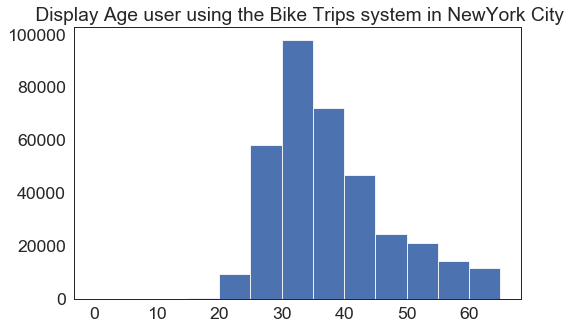

In [218]:

binsize = 10
bins = np.arange(0, NewyYorkBike_clean['Age'].max()+1,5)
plt.figure(figsize=[8, 5])

plt.hist(data = NewyYorkBike_clean, x = 'Age', bins=bins);
plt.title(' Display Age user using the Bike Trips system in NewYork City');



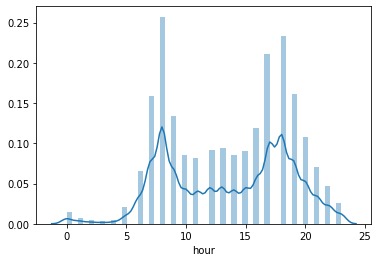

In [51]:
sb.distplot(NewyYorkBike_clean['hour']);

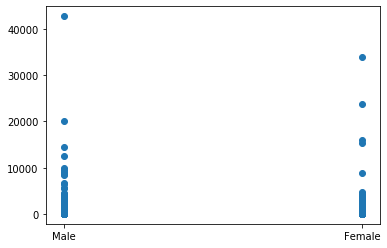

In [55]:
plt.scatter(data = NewyYorkBike_clean, x = 'gender', y = 'tripduration_minutes');

In [55]:

NewyYorkBike_clean.to_csv("NewyYorkBike_clean.csv", index=False)

### What is the structure of your dataset?


**The data setructure i clude  342966 and 15 culmns:

tripduration               
starttime                  
stoptime                   
start station id           
start station name         
start station latitude     
start station longitude    
end station id             
end station name           
end station latitude       
end station longitude     
bikeid                     
usertype                 
birth year                 
gender                     


**I creat the following 7 columns in  cleaning phase :
Age                        
tripduration_minutes       
tripduration_hour          
weekday                   
month                      
hour                       
Age_Grop

### What is/are the main feature(s) of interest in your dataset?

I want to help the administration find answers to these questions
Who is the most user type of using the system?
Who is the most gender using the system?
Who is the most age of user using the system?
Which month the demand for bike increases?
Any day of the week the usage is very high?
Any hour of the day the demand for bikes rises?
Which station is the most popular location for bike?.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
**this culmns i think its can support me :
 tripduration                         
start station name           
bikeid                     
usertype                 
birth year                 
gender                     
Age                        
tripduration_minutes       
tripduration_hour          
weekday                   
month                      
hour                       
Age group


# <a id="#Univariate Exploration">Univariate Exploration </a>


 distributions of individual variables,I will see how i can use matplotlib and seaborn to produce informative visulalization os single varibles

# 1- Display kind of user using the Bike Trips system in bar chart .

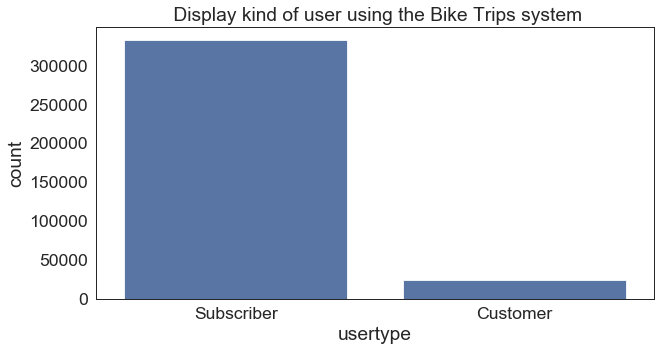

In [227]:
#Display allmost kind of user using the Bike Trips system
# create the plot
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = NewyYorkBike_clean, x = 'usertype', color = base_color)

# add annotations
n_points = NewyYorkBike_clean.shape[0]
cat_counts = NewyYorkBike_clean['usertype'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar , ,  hjbhbjjnj,m ?
    plt.title(' Display kind of user using the Bike Trips system');



Observation 1: After i see the bar chart the user from subscriber more than customer 

# 2-Display the gender of user using the Bike Trips system in Pie chart .

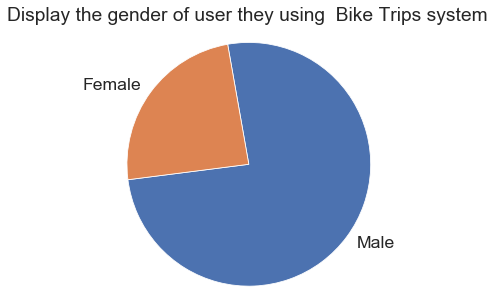

In [203]:
# code for the pie chart seen above
plt.figure(figsize = [10, 5])
sorted_counts = NewyYorkBike_clean['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 100,
        counterclock = False);
plt.axis('square');
plt.title('Display the gender of user they using  Bike Trips system');



Observation 2:after the see the Pie chart the user Male more than the female 

# 3-Display the higher months of users trips

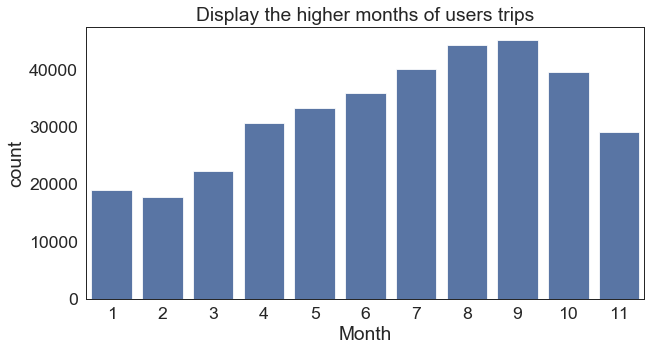

In [202]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = NewyYorkBike_clean, x = 'Month', color = base_color)
plt.title('Display the higher months of users trips');

Observation 3:whin i see the bar chart i extract the high order trips in September month then the sales increase.

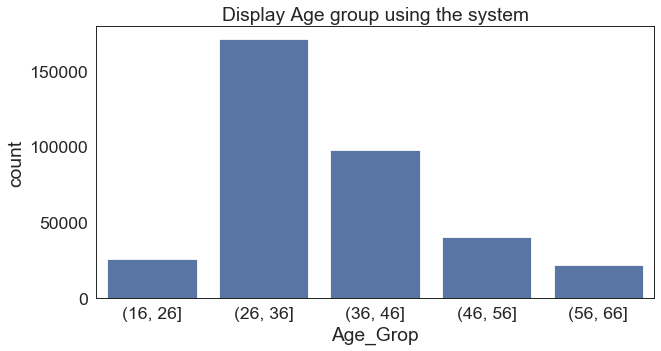

In [201]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = NewyYorkBike_clean, x = 'Age_Grop', color = base_color);
plt.title('Display Age group using the system');

Observation 4: the most user in system her age from 26 to 36 

# 4-Display the trips in the weekday


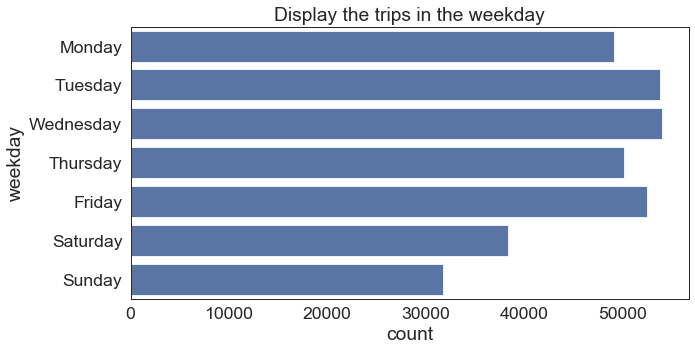

In [199]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = NewyYorkBike_clean, y = 'weekday', color = base_color);
plt.title('Display the trips in the weekday');

Observation 4 :when i see the bar chart i extract the decrease the request of trips in Saturday Sunday.

# 5-Display the trips in the day hours

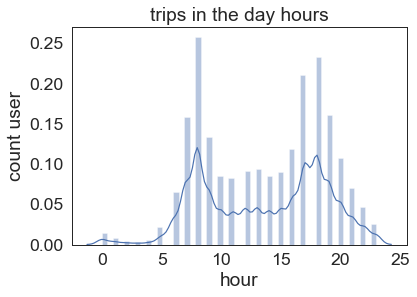

In [198]:
sb.distplot(NewyYorkBike_clean['hour'])
plt.ylabel('count user')
plt.title('trips in the day hours');


Observation 5:when i see the  chart i extract  the increase request of trips 8am and 6pm in day.

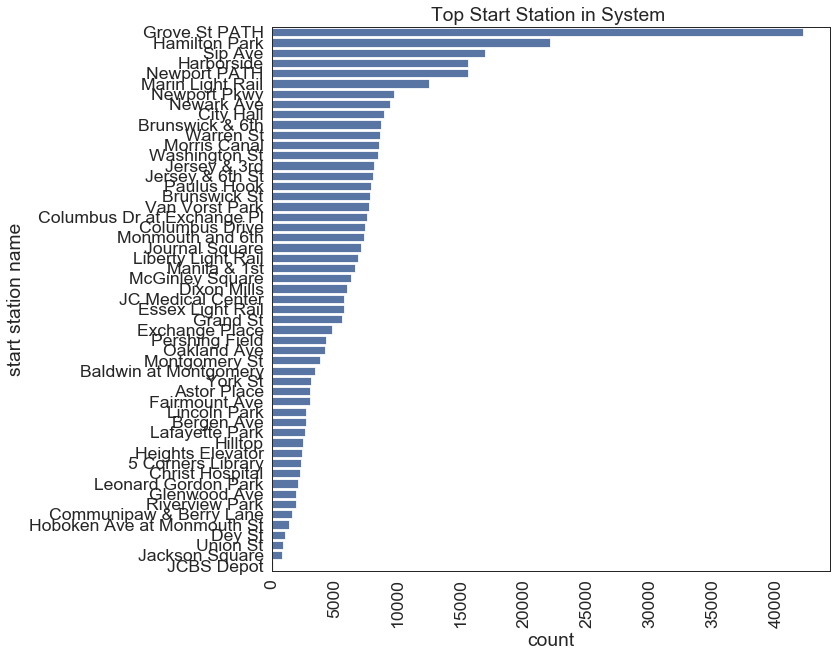

In [197]:
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]
type_order=NewyYorkBike_clean ['start station name'].value_counts().index
sb.countplot(data = NewyYorkBike_clean, y = 'start station name', color = base_color,order=type_order);
plt.title('Top Start Station in System ');
plt.xticks(rotation=90);

Observation 6:when i see the  chart i extract the most trips is start from station from Grove st Path station .

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In this distribution i use one variable to display the information
I change the datatype for starttime to datetime and i use the date and hours and weekday  for extracted useful information.
I extracted from the charts  the most days in week the user used the system  on   monday to friday then the users decrease the trips request  in weekend . The most hours until the days the user uesed the system 7-8 am and 6-5pm .
the most month the user to used  system increased on Augast and september month.
the most trips is start from station Grove st Path its very famest .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were extreme values in the ages of users and based on 99% of users I deleted more than 66 years old users.
and I delet from gender calumn the( 0=others) value 
I have some extreme values in trip duration.

# <a id="#Bivariate">Bivariate Exploration </a>
    
 distributions of individual variables,I will see how i can use matplotlib and seaborn and look at relationsips between two varibles


In [69]:
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 22 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null datetime64[ns]
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
tripduration_minutes       3567

In [141]:
NewyYorkBike_clean['hour']

0          3
1          5
2         10
5         12
6         13
          ..
385214    23
385215    23
385216    23
385217    23
385218    23
Name: hour, Length: 356719, dtype: int64

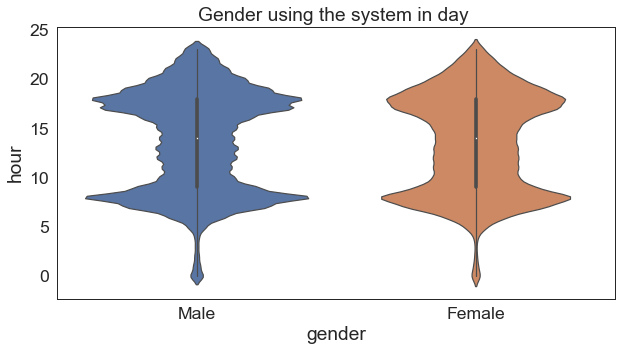

In [196]:
plt.figure(figsize = [10, 5])
sb.violinplot(data = NewyYorkBike_clean, x = 'gender', y = 'hour');
plt.title('Gender using the system in day ');

Observation 1:when i see the chart i extract the female and male start use the trips in the same time not more different .

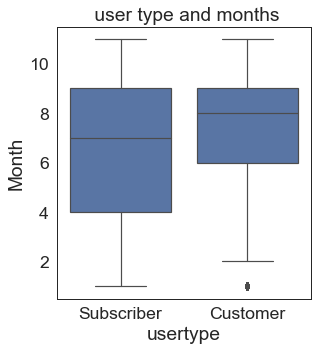

In [195]:
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = NewyYorkBike_clean, x = 'usertype', y = 'Month', color = base_color);
plt.title(' user type and months');

Observation 2:when i see the  chart i extract  the most custmer use the trips in  August.

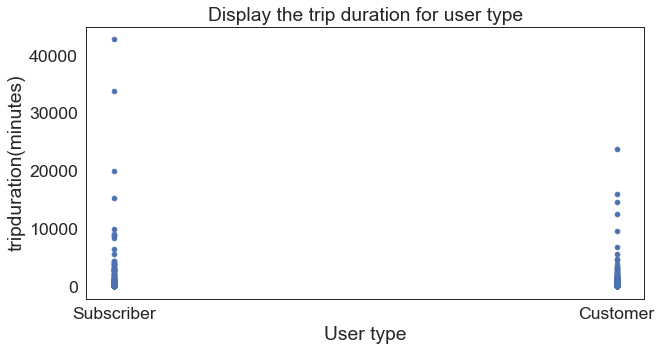

In [194]:
plt.figure(figsize = [10,5])
plt.scatter(data = NewyYorkBike_clean, x = 'usertype', y = 'tripduration_minutes');
plt.xlabel('User type')

plt.ylabel('tripduration(minutes)')
plt.title('Display the trip duration for user type');

Observation 3:when i see the  chart i extract  the Subscriber use the system mor than customer.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part the chart display the relationsips between two varibles,after   i seed the  charts i extracted  the most gender uesing  the trips system in New York  is males more than females and the Subscriber use the system mor than customer andt he most custmer use the trips in  August.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I extracted  the trip duration of subscribers more than trip duration of customer


# <a href="#Multivariate">Multivariate Exploration </a>


I will see how i can use matplotlib and seaborn and look at relationsips between three varibles


In [143]:
NewyYorkBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356719 entries, 0 to 385218
Data columns (total 22 columns):
tripduration               356719 non-null int64
starttime                  356719 non-null datetime64[ns]
stoptime                   356719 non-null object
start station id           356719 non-null int64
start station name         356719 non-null object
start station latitude     356719 non-null float64
start station longitude    356719 non-null float64
end station id             356719 non-null int64
end station name           356719 non-null object
end station latitude       356719 non-null float64
end station longitude      356719 non-null float64
bikeid                     356719 non-null int64
usertype                   356719 non-null object
birth year                 356719 non-null int64
gender                     356719 non-null object
Age                        356719 non-null int64
Age_Grop                   356719 non-null category
tripduration_minutes       3567

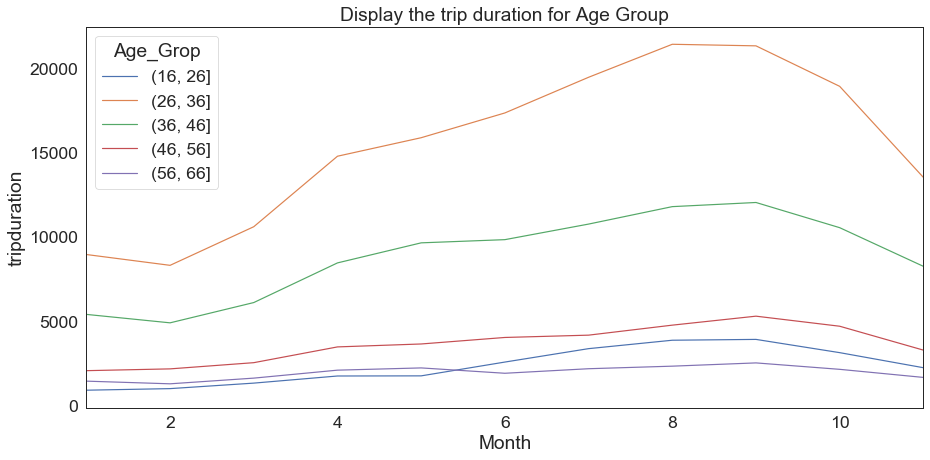

In [193]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
NewyYorkBike_clean.groupby(['Month','Age_Grop']).count()['tripduration'].unstack().plot(ax=ax)
plt.ylabel('tripduration')
plt.title('Display the trip duration for Age Group');

Observation 1:when i see the chart i extract the most user they take long duration from age group (26-36 year) and the trip duration  increase in August and September.

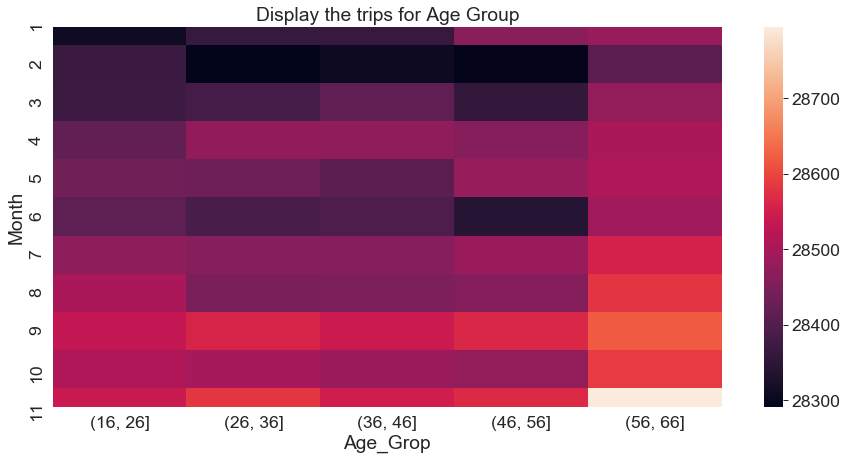

In [205]:
fig, ax = plt.subplots(figsize=(15,7))
data = NewyYorkBike_clean.pivot_table(index='Month', columns='Age_Grop', values='bikeid')
sns.heatmap(data)
plt.title('Display the trips for Age Group');

Observation 2:Iextracted from heat map the age grop from 16-26 the very increase trip in january , the age (26-56)  very increase in February and the age(46-56) very increase in June

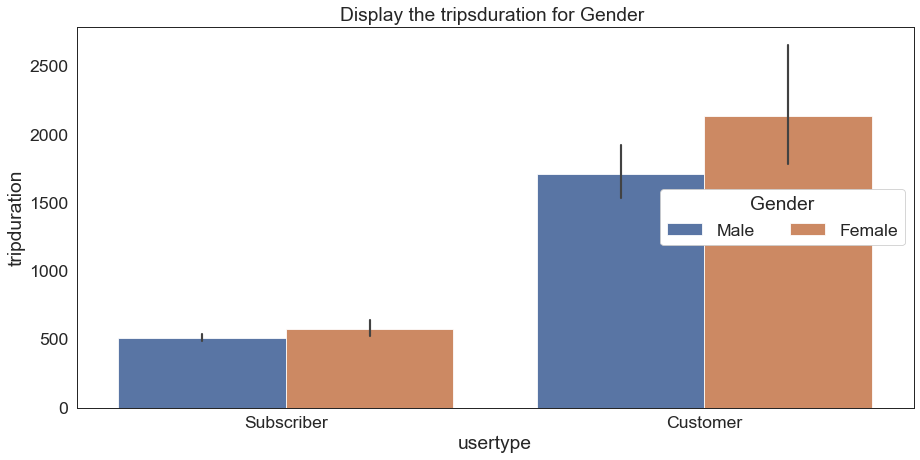

In [212]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sb.barplot(data = NewyYorkBike_clean, x = 'usertype', y = 'tripduration', hue = 'gender')
ax.legend(loc = 7, ncol = 3, framealpha = 1, title = 'Gender')
plt.title('Display the tripsduration for Gender ');

Observation 3:I extracted from chart the Female trip duration more than male trip duration in both the customer or subscriber

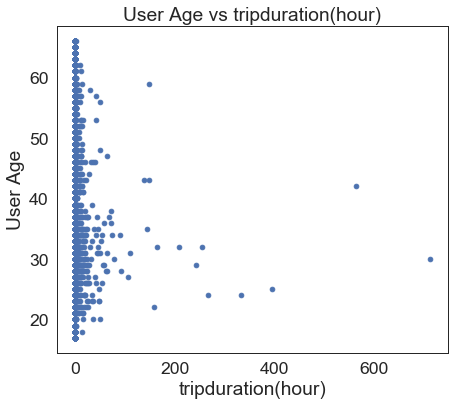

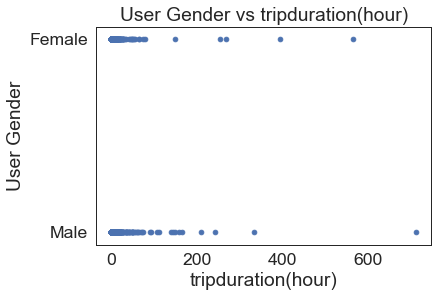

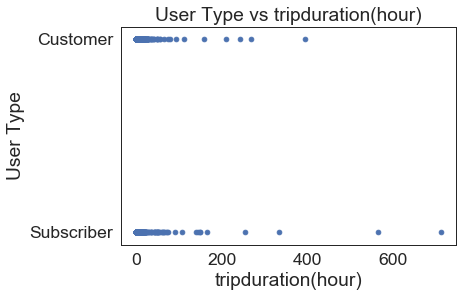

In [214]:
plt.figure(figsize=(7,6))
plt.scatter(NewyYorkBike_clean['tripduration_hour'], NewyYorkBike_clean['Age']) 
plt.title('User Age vs tripduration(hour)');
plt.xlabel('tripduration(hour)')
plt.ylabel('User Age')
plt.show() 

# scatter plot between income and sales 
plt.scatter(NewyYorkBike_clean['tripduration_hour'], NewyYorkBike_clean['gender']) 
plt.title('User Gender vs tripduration(hour)');
plt.xlabel('tripduration(hour)')
plt.ylabel('User Gender')
plt.show() 

# scatter plot between sales and age 
plt.scatter(NewyYorkBike_clean['tripduration_hour'], NewyYorkBike_clean['usertype']) 
plt.title('User Type vs tripduration(hour)');
plt.xlabel('tripduration(hour)')
plt.ylabel('User Type')
plt.show() 

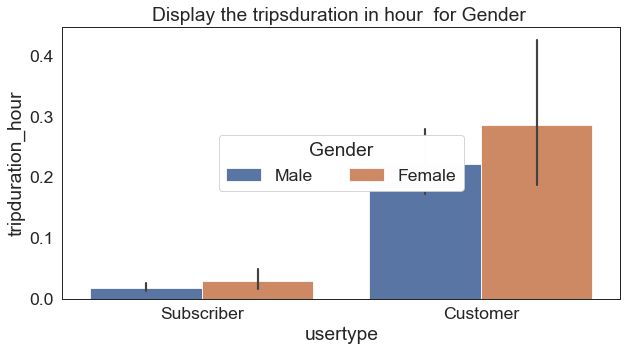

In [215]:
plt.figure(figsize = [10,5])
ax = sb.barplot(data = NewyYorkBike_clean, x = 'usertype', y = 'tripduration_hour',hue = 'gender')
ax.legend(loc = 10, ncol = 10, framealpha = 2, title = 'Gender'); 
plt.title('Display the tripsduration in hour  for Gender ');

Observation 4:I extracted from chart the Female trip duration more than male trip duration in hour both the customer or subscriber

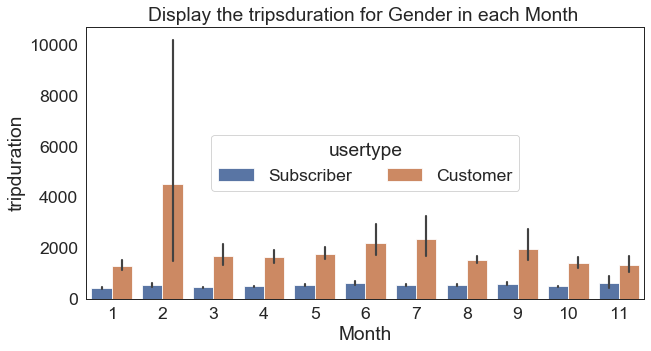

In [216]:
plt.figure(figsize = [10,5])
ax = sb.barplot(data = NewyYorkBike_clean, x = 'Month', y = 'tripduration', hue = 'usertype')
ax.legend(loc = 10, ncol = 10, framealpha = 3, title = 'usertype'); 
plt.title('Display the tripsduration for Gender in each Month ');

Observation :I extracted from chart the customer trip duration more than subsecriber trip duration ,
especially in February.

<Figure size 720x360 with 0 Axes>

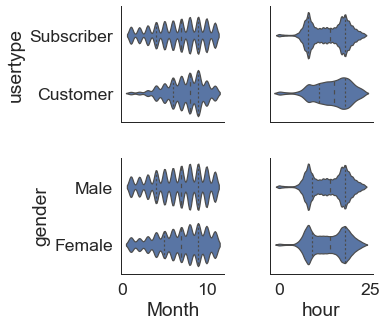

In [228]:
plt.figure(figsize = [10,5])
g = sb.PairGrid(data = NewyYorkBike_clean, x_vars = ['Month', 'hour'],
                y_vars = ['usertype','gender']);
g.map(sb.violinplot, inner = 'quartile');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part I divided the age of the users into five categories and they were represented by the graph and i extracted that most of the age groups are using a trip system in NewYork city  they are from 16 to 56 and the most age groups that have a long  trip duration are from 26 to 36 and the most gender of the long trip duration are female whether they  subscriber  or customers.


### Were there any interesting or surprising interactions between features?
yes
the Female trips duration  are longer than males
The duration of trips for users increases in August and September for the age group 26-36
Most users system from ages 16-56


# <a id="#References">References </a>:

https://classroom.udacity.com/nanodegrees/nd002-connect/dashboard/overview
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
https://stackoverflow.com/questions/31888871/pandas-replacing-column-values
https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html
https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
https://stackoverflow.com/questions/26788854/pandas-get-the-age-from-a-date-example-date-of-birth
https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
https://stackoverflow.com/questions/29096381/num-day-to-name-day-with-pandas
https://dfrieds.com/data-analysis/bin-values-python-pandas
https://www.w3resource.com/python-exercises/python-basic-exercise-65.php
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-2/
https://stackoverflow.com/questions/49608656/saving-a-dataframe-to-csv-file-python
https://www.geeksforgeeks.org/data-visualization-different-charts-python/

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!